*Import libraries*

In [141]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings

#### Reading data and Understanding

In [142]:
warnings.filterwarnings ('ignore')
data_bike = pd.read_csv ("day.csv")
data_bike.shape

(730, 16)

In [143]:
data_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [144]:
#Check for null values in the dataset
data_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [145]:
data_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [146]:
data_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

*Observation*
1. No Null values
2. No Missing values
3. One colum having date datatype, dteday

*Categorical varaibles defining*

In [147]:
data_bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [148]:
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

#### Clearing data
*Columns that are not helpful for analysis*
1. dteday (Having dates, which we already have seperate columns yr, mnth. So we can drop this)
2. casual & registered (These columns having no of bikes booked by differnt categories of the customers -> Goal is to predict total count of bikes booking)
3. instant (Only having index values - Will not help for analysis)

In [149]:
data_bike = data_bike.drop (['dteday', 'casual', 'registered', 'instant'], axis=1)

In [150]:
data_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Exploratory Data Analaysis (EDA)
*Cleansing the data values*

In [151]:
data_bike['season'] = data_bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

data_bike['mnth'] = data_bike['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

data_bike['weekday'] = data_bike['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

data_bike['weathersit'] = data_bike['weathersit'].map({1:'Clear',2:'Misty',3:'Light Rain',4:'Heavy Rainfall'})

In [152]:
data_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [153]:
print (data_bike.shape)
#Drop duplicates
data_bike.drop_duplicates(inplace=True)
#Checking after removing duplicates
data_bike.shape

(730, 12)


(730, 12)

In [154]:
data_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Univariate Analysis
*Outliers Handling*

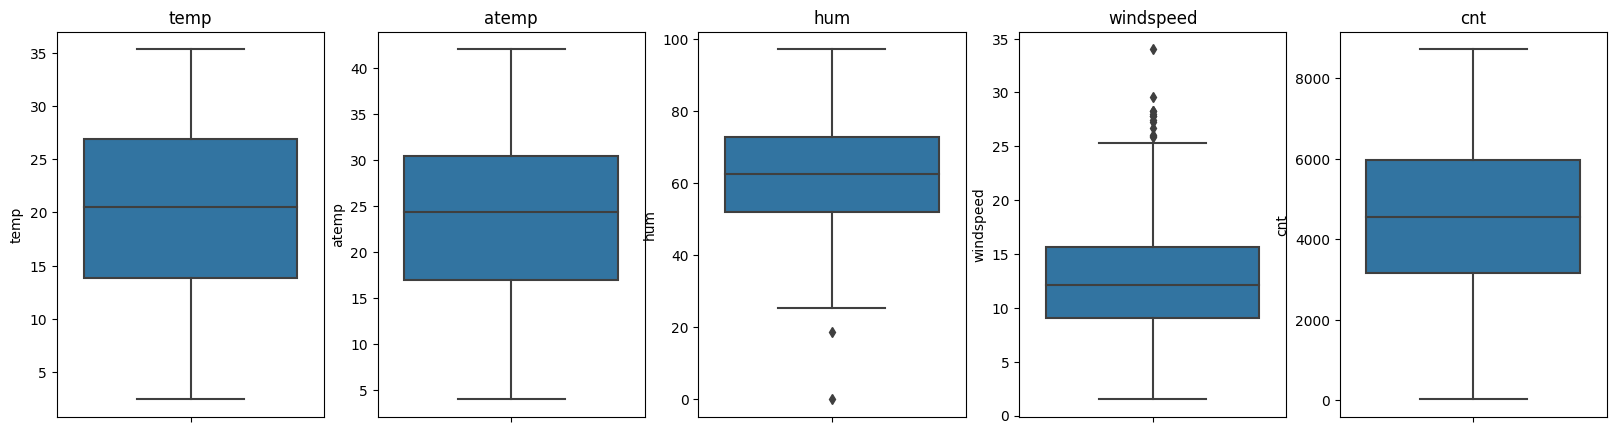

In [155]:
cont_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'] #Independent varaibles
plt.figure (figsize = (20, 5))

for id, col in enumerate (cont_vars):
    plt.subplot (1, 5, id+1)
    sns.boxplot (data=data_bike, y=col)
    plt.title (col)

There are no outliers

#### Bivaraite Analysis (against Target variable "cnt")
we already define a categorical variables let's see what are the columns there in the cat_vars

In [156]:
print (cat_vars)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


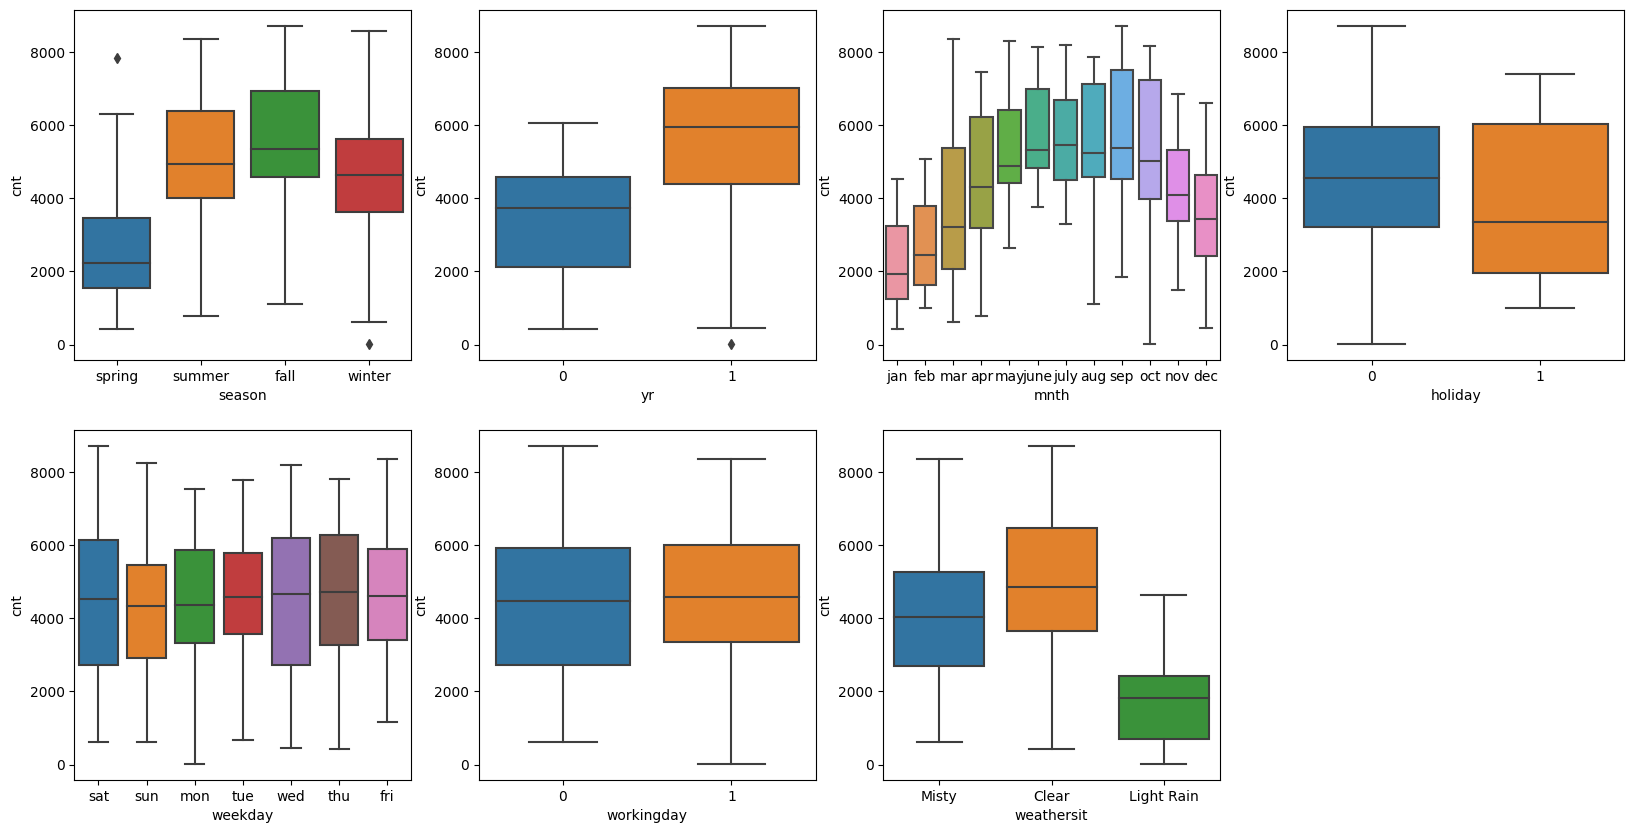

In [157]:
plt.figure(figsize=(20, 10))

for id, col in enumerate (cat_vars):
    plt.subplot (2, 4, id+1)
    sns.boxplot (x=col, y='cnt', data=data_bike)

*Observations*
1. Season - Fall seem to have more bookings
2. The next year the booking numbers is grown (0 -> 2-18, 1 -> 2019)
3. Booking in Jun, Jul, Aug, Sep and Oct are high. Sep has high no of booking among them
4. Year-end and Year-Beginning have less amount of bookings
5. When its not holiday booking has less numbers
6. Fri, Sat and Sunday has more no of bookings
7. In Clear weather set, The booking numbers are increasing.

No notable things were found from Working day boxplot


#### Correlation Visualizing

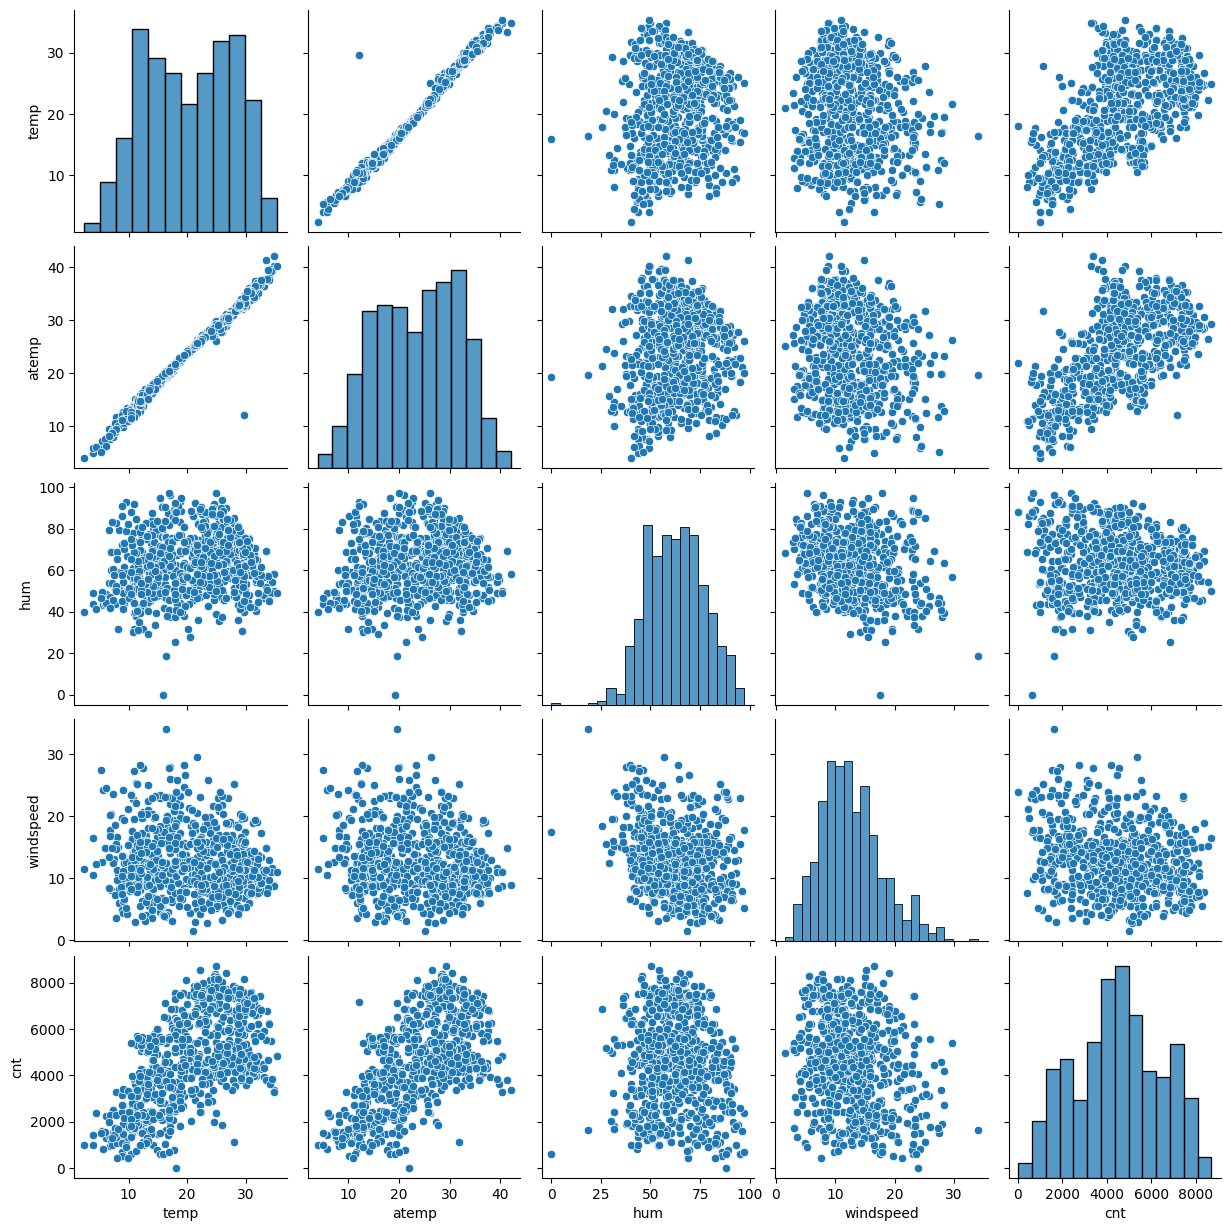

In [158]:
sns.pairplot (data=data_bike, vars=cont_vars)
plt.show()

*Heatmap Correlation*

<Axes: >

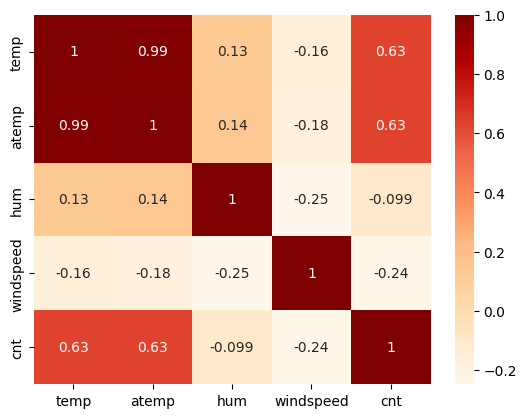

In [159]:
data_bike_corr = data_bike[cont_vars].corr()
sns.heatmap (data=data_bike_corr, annot=True, cmap='OrRd')

*Observation*
1. between temp and atemp the correlation is 0.99 which is almost 1, indicating that these two varaibles has linear relationship
2. Have to drop any one of the varaibles (temp, atemp) based on VIF, p-value againt other variables -> Due to multicollinearity, 
3. temp & atemp has linear relationship with cnt (Target Variable)

#### Data Prepararion
*Dummy variable creation*

In [160]:
data_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [161]:
season_d = pd.get_dummies (data_bike['season'], drop_first=True).astype (int)
mnth_d = pd.get_dummies (data_bike['mnth'], drop_first=True).astype (int)
weekday_d = pd.get_dummies (data_bike['weekday'], drop_first=True).astype (int)
weathersit_d = pd.get_dummies (data_bike['weathersit'], drop_first=True).astype (int)

data_bike_pre = pd.concat ( [data_bike, season_d, mnth_d, weekday_d, weathersit_d], axis=1 )
data_bike_pre = data_bike_pre.drop (columns= ['season', 'mnth', 'weekday', 'weathersit'], axis = 1)

In [162]:
data_bike_pre.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Rain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [163]:
data_bike_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    int32  
 9   summer      730 non-null    int32  
 10  winter      730 non-null    int32  
 11  aug         730 non-null    int32  
 12  dec         730 non-null    int32  
 13  feb         730 non-null    int32  
 14  jan         730 non-null    int32  
 15  july        730 non-null    int32  
 16  june        730 non-null    int32  
 17  mar         730 non-null    int32  
 18  may         730 non-null    int32  
 19  nov         730 non-null    i

In [164]:
data_bike_pre.shape

(730, 30)

In [165]:
data_bike_pre.nunique()

yr              2
holiday         2
workingday      2
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
spring          2
summer          2
winter          2
aug             2
dec             2
feb             2
jan             2
july            2
june            2
mar             2
may             2
nov             2
oct             2
sep             2
mon             2
sat             2
sun             2
thu             2
tue             2
wed             2
Light Rain      2
Misty           2
dtype: int64

#### Spliting Data into Training and Test Sets

In [166]:
data_train, data_test = train_test_split (data_bike_pre, train_size=0.7, random_state=100)

In [167]:
#shape of train and test dataset

print (data_train.shape)
print (data_test.shape)

(510, 30)
(220, 30)


*Scaling*

In [168]:
scaler = MinMaxScaler()

In [169]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Rain,Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


Rescaling numeric variables values

In [170]:
data_train [cont_vars] = scaler.fit_transform (data_train[cont_vars])

In [171]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Rain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


#### Correlation coefficient on train dataset

In [217]:
plt.figure (figsize = (20, 10))
sns.heatmap (data=data_train.corr(), cmap = 'OrRd', annot=True, mask = np.triu(data_train.corr()))
plt.show()

KeyError: "['cnt'] not in index"

<Figure size 2000x1000 with 0 Axes>

*Visualizing correlation by scatter plots*

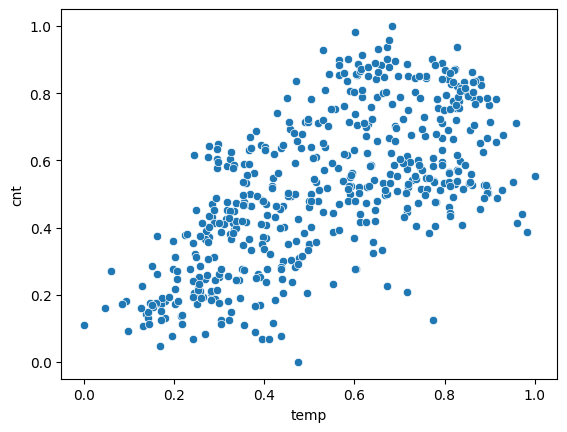

In [173]:
sns.scatterplot (x='temp', y='cnt', data=data_train)
plt.show()
    

*Observations*
1. cnt has a good correlation with temp, yr & atemp
2. Season Spring with Jan & Feb has a correaltion
3. winter with oct & nov has a good correlation
4. hum with Misty has a good correlation

In Scatterplot, confirmed that cnt has a positive correlation with temp

*X_train & y_train defining*

In [174]:
#y_train to contain only target variable
y_train = data_train.pop ('cnt')

X_train = data_train

In [175]:
print (y_train.head())
print (X_train.head())

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64
     yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686       0   
426   1        0           0  0.442393  0.438975  0.640189   0.255342       1   
728   1        0           0  0.245101  0.200348  0.498067   0.663106       1   
482   1        0           0  0.395666  0.391735  0.504508   0.188475       0   
111   0        0           1  0.345824  0.318819  0.751824   0.380981       0   

     summer  winter  ...  oct  sep  mon  sat  sun  thu  tue  wed  Light Rain  \
576       0       0  ...    0    0    0    0    0    0    1    0           0   
426       0       0  ...    0    0    0    1    0    0    0    0           0   
728       0       0  ...    0    0    0    0    1    0    0    0           0   
482       1       0  ...    0    0    0    1    0    0    0    0           0   
111    

In [176]:
#Recusrive feature elimination

lr = LinearRegression()
lr.fit (X_train, y_train)

#Variables selection by RFE
lr_rfe = RFE (lr, n_features_to_select=15)
lr_rfe = lr_rfe.fit (X_train, y_train)

In [177]:
list (zip (X_train, lr_rfe.support_, lr_rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 14),
 ('Light Rain', True, 1),
 ('Misty', True, 1)]

In [178]:
#RFE selected variables to rfe_incols
rfe_incols = X_train.columns [lr_rfe.support_]
print (rfe_incols)

X_train_rfe = X_train[rfe_incols]
print (X_train_rfe.head())

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'july', 'sep', 'sat', 'sun', 'Light Rain', 'Misty'],
      dtype='object')
     yr  holiday  workingday      temp       hum  windspeed  spring  summer  \
576   1        0           1  0.815169  0.725633   0.264686       0       0   
426   1        0           0  0.442393  0.640189   0.255342       1       0   
728   1        0           0  0.245101  0.498067   0.663106       1       0   
482   1        0           0  0.395666  0.504508   0.188475       0       1   
111   0        0           1  0.345824  0.751824   0.380981       0       1   

     winter  july  sep  sat  sun  Light Rain  Misty  
576       0     1    0    0    0           0      0  
426       0     0    0    1    0           0      1  
728       0     0    0    0    1           0      0  
482       0     0    0    1    0           0      1  
111       0     0    0    0    0           0      1  


In [179]:
#Rejected columns
X_train.columns[~lr_rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [180]:
[variance_inflation_factor (X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]

[1.0348083124838912,
 2.9079034143317983,
 50.68245273411511,
 3.616500545518215,
 1.9063224680149475,
 1.1960155992392503,
 5.019136505489791,
 2.621806891024775,
 3.4855318951434553,
 1.4875166418232997,
 1.296609975962742,
 12.199068457926447,
 11.786901106274538,
 1.249440742581619,
 1.568983375970207]

In [181]:
#Multicollinearity
def vif_cal (data):
    vif = pd.DataFrame()
    vif['features'] = data.columns
    vif['VIF'] = [variance_inflation_factor (data.values, i) for i in range (data.shape[1])]
    vif['VIF'] = round (vif['VIF'], 2)
    vif = vif.sort_values (by='VIF', ascending=False)
    return vif

In [182]:
#Calculate VIF for X_train_rfe
vif_cal (X_train_rfe)

,features,VIF
2,workingday,50.68
11,sat,12.20
12,sun,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.62
4,hum,1.91
14,Misty,1.57


varaible working day has high VIF value

#### Building a model

In [183]:
#Adding constant variable to unbias the model
X_train_lr1 = sm.add_constant (X_train_rfe)

In [184]:
X_train_lr1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,july,sep,sat,sun,Light Rain,Misty
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [185]:
model_1 = sm.OLS (y_train, X_train_lr1).fit()
print (model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          2.11e-191
Time:                        22:04:47   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.0

In [186]:
#Dropping workingday, since it has high VIF value
X_train_rfe_new = X_train_rfe.drop (['workingday'], axis = 1)

vif_cal (X_train_rfe_new)

,features,VIF
3,hum,28.25
2,temp,16.06
4,windspeed,4.68
5,spring,4.03
7,winter,3.36
6,summer,2.79
13,Misty,2.30
0,yr,2.08
8,july,1.59
9,sep,1.39


hum variables has high VIF value

In [187]:
X_train_lr2 = sm.add_constant (X_train_rfe_new)
model_2 = sm.OLS (y_train, X_train_lr2).fit()

print (model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          2.11e-191
Time:                        22:04:47   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2832      0.034      8.300      0.0

In [188]:
#Dropping hum, since it has high VIF value
X_train_rfe_new = X_train_rfe_new.drop (['hum'], axis = 1)

vif_cal (X_train_rfe_new)

,features,VIF
2,temp,5.18
3,windspeed,4.63
5,summer,2.24
4,spring,2.13
0,yr,2.07
6,winter,1.84
7,july,1.59
12,Misty,1.56
8,sep,1.34
9,sat,1.23


In [189]:
X_train_lr3 = sm.add_constant  (X_train_rfe_new)
model_3 = sm.OLS (y_train, X_train_lr3).fit()

print (model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          1.28e-188
Time:                        22:04:47   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2037      0.029      6.972      0.0

In [190]:
#Dropping sat having high p-value
X_train_rfe_new = X_train_rfe_new.drop (['sat'], axis=1)
vif_cal (X_train_rfe_new)

,features,VIF
2,temp,5.14
3,windspeed,4.60
5,summer,2.24
4,spring,2.11
0,yr,2.07
6,winter,1.81
7,july,1.59
11,Misty,1.56
8,sep,1.34
9,sun,1.18


In [191]:
X_train_lr4 = sm.add_constant (X_train_rfe_new)
model_4 = sm.OLS (y_train, X_train_lr4).fit()

print (model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          1.45e-189
Time:                        22:04:47   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2060      0.029      7.074      0.0

In [192]:
model_4.params

const         0.206034
yr            0.233472
holiday      -0.105201
temp          0.490684
windspeed    -0.147854
spring       -0.065521
summer        0.047536
winter        0.084806
july         -0.049235
sep           0.076013
sun          -0.048345
Light Rain   -0.289492
Misty        -0.082198
dtype: float64

#### Residual Analysis

In [193]:
X_train_lr4

,const,yr,holiday,temp,windspeed,spring,summer,winter,july,sep,sun,Light Rain,Misty
576,1.0,1,0,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,0,0,1


In [194]:
y_train_pred = model_4.predict (X_train_lr4)

Text(0.5, 0, 'Error')

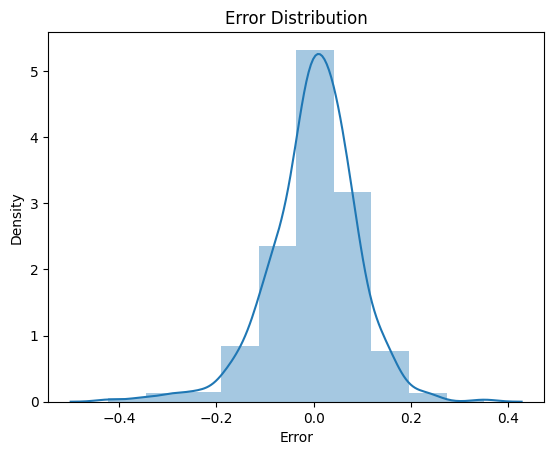

In [195]:
sns.distplot ((y_train - y_train_pred), bins = 10)
plt.title ("Error Distribution")
plt.xlabel ("Error")


Errors are normally distributed with 0 as mean

In [196]:
vif_cal (X_train_rfe_new)

,features,VIF
2,temp,5.14
3,windspeed,4.60
5,summer,2.24
4,spring,2.11
0,yr,2.07
6,winter,1.81
7,july,1.59
11,Misty,1.56
8,sep,1.34
9,sun,1.18


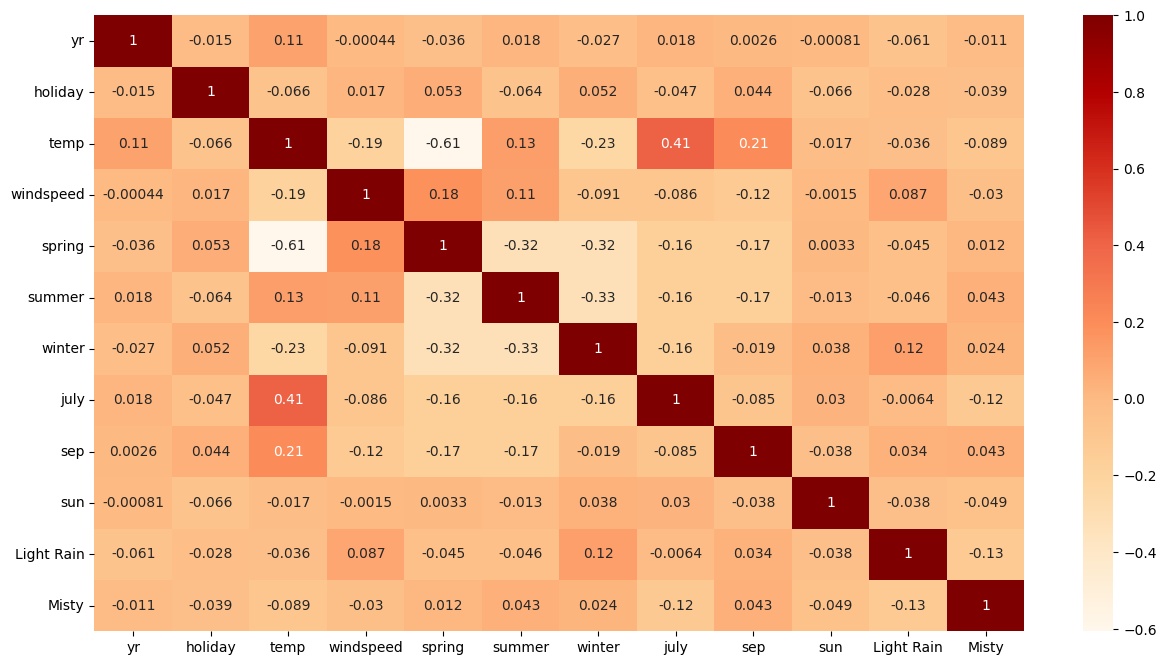

In [197]:
plt.figure (figsize=(15, 8))
sns.heatmap (data=X_train_rfe_new.corr(), cmap='OrRd', annot=True)
plt.show()

There are no Multicolinearity

*Inference Linearity*

Text(0, 0.5, 'Residuals')

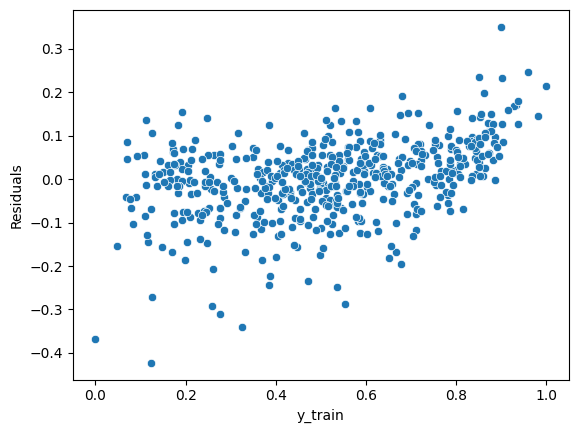

In [198]:
res = y_train - y_train_pred
sns.scatterplot (x=y_train, y=res)
plt.xlabel ("y_train")
plt.ylabel ("Residuals")

Text(0.5, 0.98, 'Actual vs Predicted')

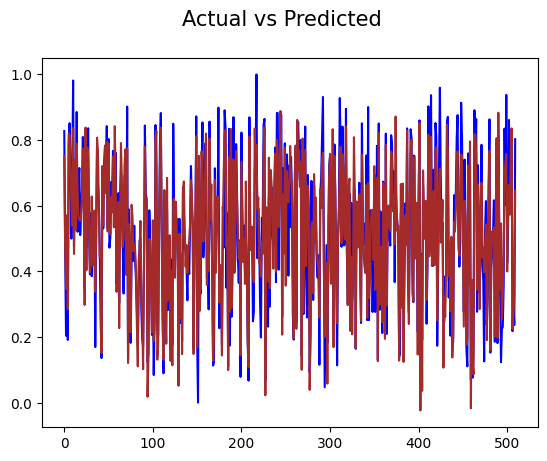

In [199]:
c = [i for i in range(0,len(X_train_lr4),1)]
plt.plot(c,y_train, color='blue')
plt.plot(c,y_train_pred, color='brown')
plt.suptitle('Actual vs Predicted', fontsize = 15)

In [200]:
train_r2 = round (r2_score (y_train, y_train_pred), 4)
print (train_r2)

0.8409


R2 Score is 0.8 which near to 1, which is a better fit

In [201]:
train_r2_adjusted = round (1 - (1 - train_r2) * ((X_train.shape[0] - 1)/(X_train.shape[0] - X_train.shape[1] - 1)), 4)
print (train_r2_adjusted)

0.8313


*Observation*<br>
R2 score and adjusted R2 value are almost same, this means this model is fit for the prediction

*Linearity Observations*

<Figure size 1000x500 with 0 Axes>

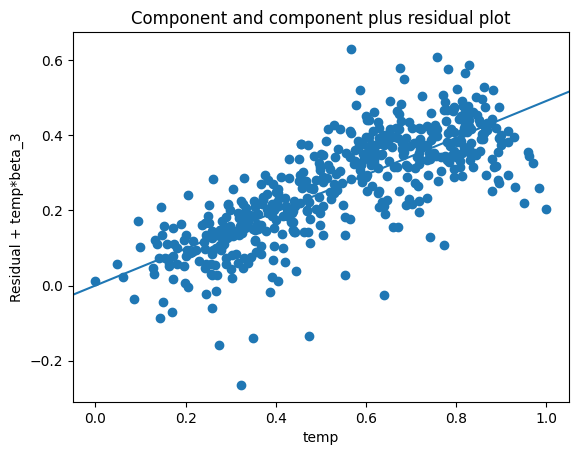

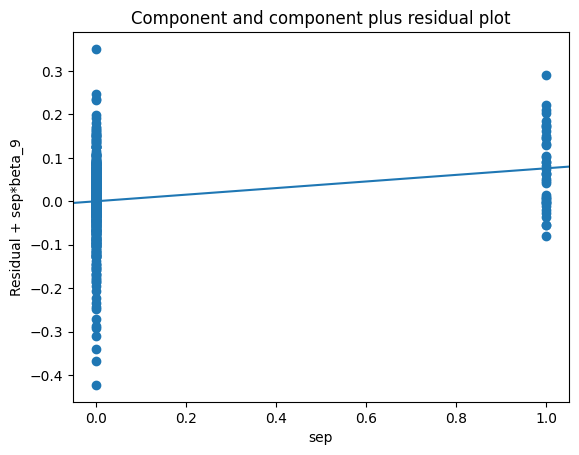

In [202]:
plt.figure (figsize = (10, 5))

sm.graphics.plot_ccpr(model_4, 'temp')
plt.show()

sm.graphics.plot_ccpr(model_4, 'sep')
plt.show()

#### Model Evaluation

#### Making prediction on Test dataset

In [203]:
data_test[cont_vars] = scaler.transform (data_test[cont_vars])

In [204]:
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Rain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [205]:
data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Rain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [206]:
y_test = data_test.pop ('cnt')
X_test = data_test [X_train_rfe_new.columns]

In [207]:
X_test_lr4 = sm.add_constant (X_test)

In [208]:
y_pred = model_4.predict (X_test_lr4)

In [209]:
test_r2 = round (r2_score (y_test, y_pred), 4)
print (test_r2)

0.808


#### Homoscedacity

Text(0.5, 1.0, 'Inference Error between y_test & y_pred')

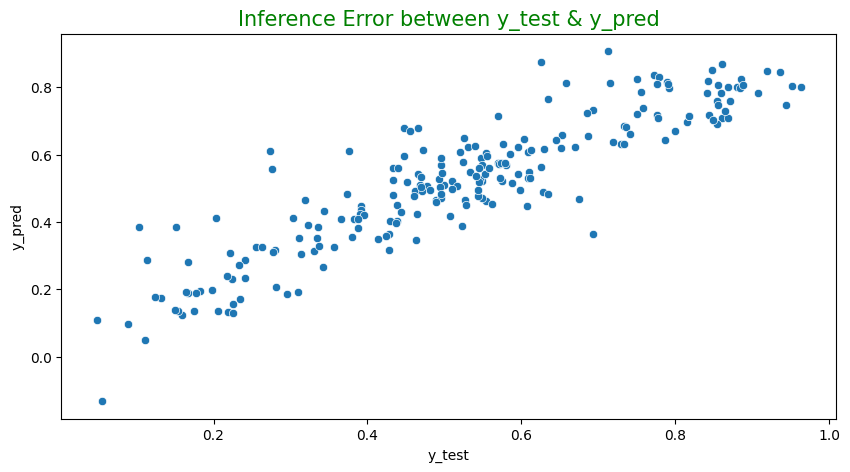

In [210]:
plt.figure (figsize=(10, 5))
sns.scatterplot (x=y_test, y=y_pred)
plt.xlabel ("y_test")
plt.ylabel ("y_pred")
plt.title ("Inference Error between y_test & y_pred", fontsize=15, color='green')

In [211]:
test_r2_adjusted = round (1 - (1 - test_r2) * ((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)), 4)
print (test_r2_adjusted)

0.7969


Text(0.5, 1.0, 'Inference from Regression plot test vd pred')

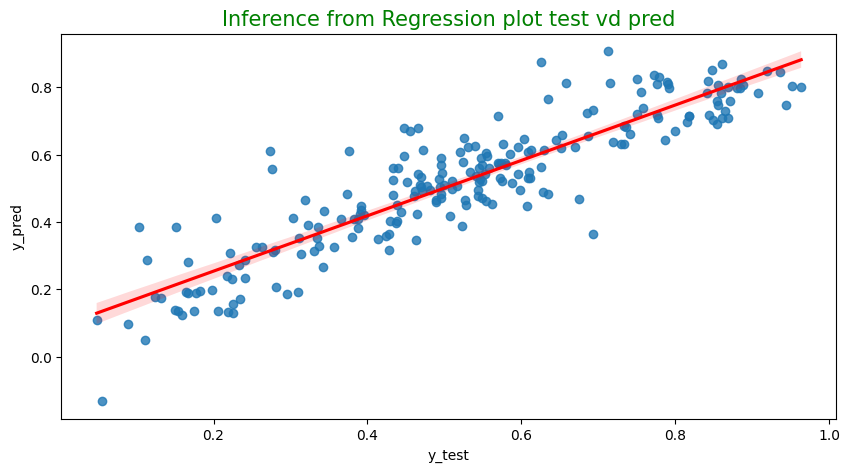

In [212]:
plt.figure (figsize = (10, 5))
sns.regplot (x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel ('y_test')
plt.ylabel ('y_pred')
plt.title ('Inference from Regression plot test vd pred', fontsize = 15, color = 'green')

Text(0, 0.5, 'Counts')

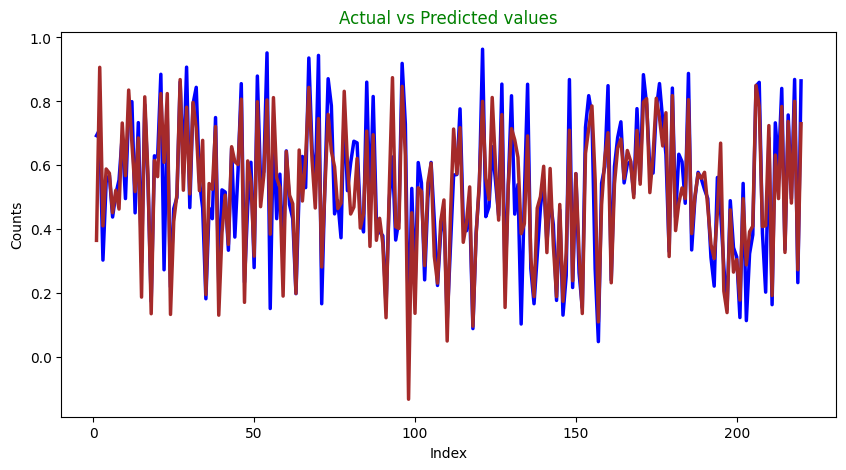

In [213]:
plt.figure (figsize = (10, 5))
c = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="brown", linewidth=2.5, linestyle="-")
plt.title ('Actual vs Predicted values', color='green')
plt.xlabel ('Index')
plt.ylabel ('Counts')

Inference between training & test Dataset by R2 and Adjusted R2

In [214]:
print (f'R2 of Test Dataset: {test_r2}')
print (f'Adjusted R2 of Test Dataset: {test_r2_adjusted}')

R2 of Test Dataset: 0.808
Adjusted R2 of Test Dataset: 0.7969


In [215]:
print (f'R2 of Train Dataset: {train_r2}')
print (f'Adjusted R2 of Train Dataset: {train_r2_adjusted}')

R2 of Train Dataset: 0.8409
Adjusted R2 of Train Dataset: 0.8313


#### Conclusion:
**Model_4 is the best fit for the cnt prediction**<br>
-> Having best r2 and adjusted r2 between train & test datasets

<br>
Bike booking is depends on the following variables:<br><br>
<li> Season - Summer & Fall </li>
<li> Year </li>
<li> Month - Jun, Jul, Aug, Sep and Oct </li>
<li> Holiday </li>
<li> Weekend - Sunday </li>
<li> Weather sit - Clear, Misty, Cloudy </li>
<li> temp </li>
<li> windspeed </li>
<br>
**Explanation:**
<br><br>
temp (co-eff: 0.4907) -> Meaning that there is a **increase** in booking with 0.4907 <br>
summer(co-eff: 0.0475) -> Meaning that there is a **increase** in booking with 0.0475 <br>
Light Rain(co-eff: -0.2895 -> Meaning that there is a **decrease** in booking with 0.2895 <br>
windspeed(co-eff: -0.1479 -> Meaning that there is a **decrease** in booking with 0.1479 <br>

*These variables can be considered to predict the booking demand*